# Introduction 
Le traitement du langage naturel est une branche de l'intelligence artificielle qui traite de l'interaction entre les ordinateurs et le langage humain. L'un des cas d'utilisation de NLP est la classification de documents, qui peut aider à trier et à organiser de grandes quantités de documents en fonction de leur contenu.

Dans le contexte juridique, la classification de documents peut être particulièrement utile pour trier et organiser les documents en fonction de leur thème ou de leur domaine. Dans ce cas précis, la classification de documents juridiques portant peut aider à identifier rapidement les documents pertinents pour un avocat ou un chercheur.

En utilisant les techniques de NLP, il est possible d'extraire les caractéristiques importantes des documents juridiques et de les utiliser pour entraîner un modèle de classification de documents. Ce modèle pourrait ensuite être utilisé pour classer automatiquement de nouveaux documents juridiques en fonction de leur thème.

Cette approche de la classification de documents juridiques peut offrir des avantages tels que la réduction du temps et des coûts associés à la recherche manuelle de documents pertinents, ainsi que la possibilité d'identifier rapidement des documents pertinents pour des études ou des affaires juridiques.

In [ ]:
import re  # importe le module pour les expressions régulières
import string  # importe le module pour la manipulation de chaînes de caractères

import numpy as np  # importe la bibliothèque pour les calculs numériques
import random  # importe la bibliothèque pour la génération de nombres aléatoires
import pandas as pd  # importe la bibliothèque pour la manipulation de données
import matplotlib.pyplot as plt  # importe la bibliothèque pour la visualisation de données
import seaborn as sns  # importe la bibliothèque pour la visualisation de données avancées
%matplotlib inline  # permet d'afficher les graphiques directement dans le notebook
from plotly import graph_objs as go  # importe les outils pour créer des graphiques interactifs
import plotly.express as px  # importe les outils pour créer des graphiques interactifs
import plotly.figure_factory as ff  # importe les outils pour créer des graphiques interactifs
from collections import Counter  # importe le module pour compter les éléments dans une liste

from PIL import Image  # importe le module pour manipuler des images
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # importe les outils pour créer des nuages de mots

import nltk  # importe la bibliothèque pour le traitement du langage naturel
from nltk.corpus import stopwords  # importe les outils pour filtrer les mots courants dans une langue donnée

from tqdm import tqdm  # importe le module pour afficher une barre de progression lors de l'exécution de boucles
import os  # importe le module pour manipuler les fichiers
import nltk  # importe à nouveau la bibliothèque pour le traitement du langage naturel
import spacy  # importe la bibliothèque pour le traitement du langage naturel basée sur les modèles
from spacy import displacy  # importe les outils pour afficher les résultats de l'analyse linguistique de SpaCy
nlp = spacy.load("fr_core_news_sm")  # charge le modèle linguistique en français pour SpaCy
import random  # importe à nouveau la bibliothèque pour la génération de nombres aléatoires
from spacy.util import compounding  # importe les outils pour l'entraînement des modèles SpaCy
from spacy.util import minibatch  # importe les outils pour l'entraînement des modèles SpaCy
import json  # importe le module pour manipuler des fichiers JSON
import warnings  # importe le module pour gérer les messages d'avertissement
warnings.filterwarnings("ignore")  # ignore les messages d'avertissement

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
# Le code ci-dessus importe différentes bibliothèques et outils pour l'analyse de données, la visualisation, le traitement du langage naturel et l'apprentissage automatique.




# Extraction des données 
Judilibre est une API permettant d'accéder aux documents de la jurisprudence française. L'extraction de ces documents est essentielle pour l'analyse de texte et la classification de documents juridiques. Pour extraire ces documents, nous utilisons une boucle qui parcourt chaque fichier de la base de données de Judilibre, les ouvre avec l'encodage UTF-8 et charge les données JSON à l'aide de la méthode json.load(). Ensuite, nous extrayons les données de texte, de juridiction, de chambre, de publication, de solution et de thèmes à partir de chaque document et les stockons dans des listes distinctes. Nous créons finalement un DataFrame Pandas contenant les données de texte extraites pour chaque document. Cette extraction de données est une étape cruciale pour l'analyse de texte et la classification des documents juridiques, car elle fournit une base solide pour la modélisation de machine learning qui suit.

In [ ]:
# Créer un dataframe vide avec une plage d'index allant de 0 à 999
df_final = pd.DataFrame(index=range(1000))

# Initialiser des listes vides pour stocker les données de chaque colonne
text = []
jurisdiction= []
chamber= []
formation = []
publication = []
solution = []
summary = []
themes = []
generaltheme=[]

# Définir une liste de noms de fichiers contenant les données JSON
file_names = ['C:\\Users\\33751\\OneDrive\\Bureau\\master\\nlp\\projects\\data\\batch0.json','C:\\Users\\33751\\OneDrive\\Bureau\\master\\nlp\\projects\\data\\batch1.json'
                  ,'C:\\Users\\33751\\OneDrive\\Bureau\\master\\nlp\\projects\\data\\batch2.json','C:\\Users\\33751\\OneDrive\\Bureau\\master\\nlp\\projects\\data\\batch3.json',
                  'C:\\Users\\33751\\OneDrive\\Bureau\\master\\nlp\\projects\\data\\batch4.json','C:\\Users\\33751\\OneDrive\\Bureau\\master\\nlp\\projects\\data\\batch5.json',
                  'C:\\Users\\33751\\OneDrive\\Bureau\\master\\nlp\\projects\\data\\batch6.json','C:\\Users\\33751\\OneDrive\\Bureau\\master\\nlp\\projects\\data\\batch7.json',
                 'C:\\Users\\33751\\OneDrive\\Bureau\\master\\nlp\\projects\\data\\batch8.json','C:\\Users\\33751\\OneDrive\\Bureau\\master\\nlp\\projects\\data\\batch9.json']

# Boucle à travers chaque fichier de données
for file_name in file_names:
    # Ouvrir le fichier JSON et charger les données
    with open(file_name, encoding='utf-8') as f:
        data = json.load(f)
    # Parcourir chaque résultat dans les données
    for i in range(0, len(data['results'])):
        # Ajouter les données de chaque colonne à la liste correspondante
        text.append(data['results'][i]['text'])
        jurisdiction.append(data['results'][i]['jurisdiction'])


,text,chamber,publication,solution,jurisdiction,themes
0,"LA COUR DE CASSATION, CHAMBRE COMMERCIALE, a r...",comm,[b],rejet,cc,"[douanes, taxes diverses perçues, taxes intéri..."
1,"LA COUR DE CASSATION, CHAMBRE CRIMINELLE, a re...",cr,[b],cassation,cc,"[douanes, agent des douanes, pouvoirs, droit d..."
2,"LA COUR DE CASSATION, CHAMBRE COMMERCIALE, a r...",comm,[b],cassation,cc,"[douanes, droits, recouvrement, avis de mise e..."
3,"LA COUR DE CASSATION, CHAMBRE CRIMINELLE, a re...",cr,[b],rejet,cc,"[douanes, agent des douanes, pouvoirs, droit d..."
4,"LA COUR DE CASSATION, CHAMBRE COMMERCIALE, a r...",comm,[b],rejet,cc,"[douanes, droits, remboursement de droits indû..."
...,...,...,...,...,...,...
905,SUR LE MOYEN UNIQUE : ATTENDU QUE L'ARRET ATTA...,civ1,[n],rejet,cc,"[conflit de lois, application de la loi étrang..."
906,"SUR LE PREMIER MOYEN, PRIS EN SES DEUX BRANCHE...",civ1,[n],rejet,cc,"[conflit de lois, statut personnel, mariage, p..."
907,"SUR LES DEUX MOYENS REUNIS :\n\n ATTENDU QUE, ...",civ1,[b],rejet,cc,"[1) conflits de lois, application de la loi ét..."
908,SUR LE MOYEN UNIQUE : ATTENDU QUE L'ARRET ATTA...,civ1,[n],rejet,cc,"[conflit de lois, application de la loi étrang..."


In [ ]:
df.describe(include='all')

,text,chamber,publication,solution,jurisdiction,themes
count,910,910,910,910,910,910
unique,878,8,2,9,1,755
top,AU NOM DU PEUPLE FRANCAIS\n\n\n LA COUR DE CAS...,civ1,[b],rejet,cc,"[communaute europeenne, douanes, droits, octro..."
freq,2,421,740,497,910,22


on a choisit trois themes: 
"douanes"

"divorce, séparation de corps"

"conflit de lois"

# Traitements des textes:


In [ ]:

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\33751\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization


### Les espaces

Des espaces multiples ou des retours à la ligne peuvent s’insérer dans le texte pour des raisons de mise en forme, mais ils sont rarement utiles pour la modélisation. On peut donc les enlever de façon similaire à la ponctuation, en utilisant l’attribut .is_space. Dans notre exemple, cela permet de se débarrasser des doubles sauts de ligne \n\n

### la ponctuation

Souvent dans les modèles NLP, la ponctuation a peu d’importance. Par exemple, si l’on souhaite classer des articles de blog selon leur thématique, il y a peu de chances que la ponctuation porte du signal. Un premier nettoyage possible serait donc d’ignorer tous les tokens qui sont des signes de ponctuation. Avec spacy, cela se fait simplement dans une list comprehension grâce à l’attribut .is_punct de la classe Token

#### Les stops words
En NLP, les stop words sont les tokens très fréquents dans une langue donnée. Ces tokens étant présents dans la plupart des textes, ils ont un
pouvoir discriminant assez faible. On a donc tendance à les supprimer pour réduire encore plus la taille du vocabulaire. 

In [ ]:
df.text[0]

"LA COUR DE CASSATION, CHAMBRE COMMERCIALE, a rendu l'arrêt suivant : \n\n\n\n\n\n Sur le moyen unique :\n\n\n Attendu, selon l'arrêt attaqué (Poitiers,19 mars 2013), que la Régie des transports poitevins - Vitalis (la Régie), établissement public industriel et commercial qui exerce une activité de transport en commun de voyageurs dans la commune de Poitiers, a bénéficié, pour les années 2006 et 2007, en application de l'article 265 sexies du code des douanes, du remboursement partiel de la taxe intérieure de consommation sur le gaz naturel des véhicules (TICGN) ; qu'à la suite d'un contrôle de ses déclarations aux fins de remboursement, l'administration des douanes a constaté que la Régie n'avait pas fourni les justifications exigées et qu'elle avait en conséquence bénéficié indûment de remboursements ; que la Régie ne s'étant pas acquittée des sommes qui lui étaient réclamées au titre de l'indu, un avis de mise en recouvrement (AMR) de ces sommes a été émis à son encontre ; que l'adm

On utilise la bibliothèque NLTK  pour télécharger les mots vides (stopwords) en français.

Les mots vides sont des mots très courants qui apparaissent fréquemment dans un texte, mais qui ne portent pas de sens en eux-mêmes, tels que « et », « le », « la », « de », etc. L'objectif d'utiliser une liste de mots vides est de filtrer ces mots du texte avant de procéder à une analyse ultérieure, afin de se concentrer sur les mots qui ont plus de sens pour comprendre le contenu du texte.







In [ ]:
####definir les stops words
nltk.download('stopwords')
from nltk.corpus import stopwords
L1 = stopwords.words('french')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\33751\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Avant de faire le traitement de données, on effectue un split pour rendre le texte sous forme de mots separés.

In [ ]:
df['temp_list'] = df['text'].apply(lambda x:str(x).split())

Ce code effectue une transformation sur chaque élément de la colonne temp_list en utilisant un modèle de traitement de langage naturel (NLP) de spaCy. Le but de cette étape est de normaliser chaque mot dans la liste et de filtrer les mots vides (stopwords), les ponctuations, les espaces et les noms propres (par exemple les noms de personnes).

In [ ]:
# Add a new stop word to the set
from unidecode import unidecode
for i in range (0,len(df['temp_list'])):
    doc= nlp(df['text'][i])
    df['temp_list'][i]= [unidecode(token.lemma_.lower()) for token in doc if (not token.is_punct) and 
                         (not token.is_space)  and (not token.is_stop) and len(token) > 1 
                         and (not token.ent_type_ == "PER") ]


Dans le code ci-dessous, on cree une liste de mots additionnels à supprimer de notre colonne temp_list.

In [ ]:
L=['M','nom','peuple','français','euro','mme', 'article', 'societe','article','arret',
   'chambre','appel','cour','juillet','droit','code', 'loi']
for i in range (len(df['temp_list'])):
    for j in range(len(df['temp_list'][i])-1, -1, -1):                   
        if df['temp_list'][i][j] in L:
            df['temp_list'][i].remove(df['temp_list'][i][j])



on supprime après les nombres.


In [ ]:
#### supprimer les nombres
for i in range (len(df['temp_list'])):
    df['temp_list'][i] = [word for word in df['temp_list'][i] if not word.isdigit()]

In [ ]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,moyen,4646
1,douane,4433
2,etre,3825
3,civil,3447
4,motif,2607
5,procedure,2497
6,francais,2491
7,disposition,2429
8,cassation,2342
9,demande,2210


# LDA
L'analyse de la distribution latente (LDA) est une technique d'analyse de données couramment utilisée pour identifier les sujets dans un grand ensemble de documents. L'objectif principal de LDA est d'extraire les sujets sous-jacents dans les documents et d'analyser la distribution de ces sujets à travers l'ensemble des documents. Cela permet de mieux comprendre les thèmes abordés dans les documents et de découvrir des relations cachées entre eux. Le processus de LDA implique la transformation de chaque document en un vecteur de poids de termes, puis l'application d'un modèle probabiliste pour identifier les sujets sous-jacents dans l'ensemble des documents.

In [ ]:
import gensim
from gensim import corpora
# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(df['temp_list'])

# Convert the tokenized documents into a bag-of-words representation
corpus = [dictionary.doc2bow(doc) for doc in df['temp_list']]

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=30)

# Print the topics and their top words
for topic in lda_model.show_topics():
    print(topic)

(0, '0.021*"douane" + 0.011*"etre" + 0.009*"moyen" + 0.009*"taxe" + 0.008*"administration" + 0.008*"marchandise" + 0.008*"communautaire" + 0.007*"douanier" + 0.007*"procedure" + 0.007*"disposition"')
(1, '0.015*"civil" + 0.014*"moyen" + 0.010*"francais" + 0.008*"epoux" + 0.007*"motif" + 0.007*"etre" + 0.007*"party" + 0.006*"divorce" + 0.006*"demande" + 0.006*"cassation"')
(2, '0.015*"contrat" + 0.014*"travail" + 0.009*"francais" + 0.008*"etre" + 0.008*"convention" + 0.007*"moyen" + 0.007*"applicable" + 0.006*"application" + 0.006*"disposition" + 0.006*"salarie"')


Le modèle LDA a identifié trois sujets différents dans le corpus de textes. Le premier sujet semble être lié aux douanes, avec des mots tels que "douane", "taxe", "administration", "marchandise", "communautaire" et "douanier". Le deuxième sujet semble être lié au "divorce, séparation de corps", avec des mots tels que "civil", "français", "epoux", "divorce", "demande" et "cassation". Le troisième sujet semble être lié au "conflit de lois", avec des mots tels que "contrat", "travail", "convention", "salarie", "application" et "disposition". Les coefficients indiquent la probabilité de chaque mot appartenir à un sujet particulier.

ce qui est le résultat esperée. 


In [ ]:
lda_model.save("lda_model.model")
dictionary.save("dictionary.dict")

In [ ]:
topic_words = lda_model.show_topic(2)
print(f"Topic conflit de loi :")
for word, prob in topic_words:
    print(f"{word}: {prob}")


Topic conflit de loi :
contrat: 0.015333835035562515
travail: 0.0141141964122653
francais: 0.008928094059228897
etre: 0.008268052712082863
convention: 0.008071611635386944
moyen: 0.007115006912499666
applicable: 0.0068002003245055676
application: 0.0062369550578296185
disposition: 0.00620183115825057
salarie: 0.0061272913590073586


In [ ]:
topic_words = lda_model.show_topic(1)
print(f"Topic divorce:")
for word, prob in topic_words:
    print(f"{word}: {prob}")


Topic divorce:
civil: 0.015386776998639107
moyen: 0.01395318005234003
francais: 0.010211791843175888
epoux: 0.0077155702747404575
motif: 0.007028249558061361
etre: 0.006653700955212116
party: 0.00651942566037178
divorce: 0.006488904356956482
demande: 0.0062934281304478645
cassation: 0.005879855714738369


In [ ]:
topic_words = lda_model.show_topic(0)
print(f"Topic douane:")
for word, prob in topic_words:
    print(f"{word}: {prob}")


Topic douane:
douane: 0.021484432741999626
etre: 0.010633298195898533
moyen: 0.00937033724039793
taxe: 0.009164916351437569
administration: 0.008129570633172989
marchandise: 0.007847165688872337
communautaire: 0.007803312037140131
douanier: 0.007372262887656689
procedure: 0.007203417830169201
disposition: 0.006725745275616646


Le code ci-dessous permet de parcourir tous les documents dans le corpus, puis d'afficher pour chaque document les probabilités que celui-ci appartienne à chacun des thèmes identifiés par le modèle LDA. Pour chaque document, les probabilités sont triées par ordre décroissant, ce qui signifie que la première probabilité correspond au thème le plus probable pour ce document.

In [ ]:
for i, doc in enumerate(corpus):
    topics = lda_model.get_document_topics(doc)
    print(f"Document {i+1}:")
    for topic in topics:
        print(f"Topic {topic[0]}: {topic[1]}")
    print()

Document 1:
Topic 0: 0.9997609257698059

Document 2:
Topic 0: 0.9670149087905884
Topic 2: 0.03227580338716507

Document 3:
Topic 0: 0.9992350935935974

Document 4:
Topic 0: 0.9256928563117981
Topic 1: 0.07307275384664536

Document 5:
Topic 0: 0.972272515296936
Topic 2: 0.0274336114525795

Document 6:
Topic 0: 0.6441970467567444
Topic 2: 0.3554443418979645

Document 7:
Topic 0: 0.7781131267547607
Topic 2: 0.2213319092988968

Document 8:
Topic 0: 0.9798092842102051
Topic 1: 0.016531717032194138

Document 9:
Topic 0: 0.9994208216667175

Document 10:
Topic 0: 0.9995646476745605

Document 11:
Topic 0: 0.9992059469223022

Document 12:
Topic 0: 0.9794036149978638
Topic 2: 0.020240262150764465

Document 13:
Topic 0: 0.7187616229057312
Topic 1: 0.012167222797870636
Topic 2: 0.26907116174697876

Document 14:
Topic 0: 0.8616406917572021
Topic 2: 0.13785578310489655

Document 15:
Topic 0: 0.9966596961021423

Document 16:
Topic 0: 0.9981551766395569

Document 17:
Topic 0: 0.9995540976524353

Docume

##### on peut voir clairement que le model prevoit exactement le theme de chaque document 

In [ ]:
# Define a list of topic labels
topic_labels = ["douanes","conflit de lois","divorce"]

# Print the top words and labels for each topic
for idx, topic in lda_model.show_topics(formatted=False):
    words = [w[0] for w in topic]
    print('Topic: {} \nLabel: {} \nWords: {}\n'.format(idx, topic_labels[idx], words))

Topic: 0 
Label: douanes 
Words: ['douane', 'etre', 'moyen', 'taxe', 'administration', 'marchandise', 'communautaire', 'douanier', 'procedure', 'disposition']

Topic: 1 
Label: conflit de lois 
Words: ['civil', 'moyen', 'francais', 'epoux', 'motif', 'etre', 'party', 'divorce', 'demande', 'cassation']

Topic: 2 
Label: divorce 
Words: ['contrat', 'travail', 'francais', 'etre', 'convention', 'moyen', 'applicable', 'application', 'disposition', 'salarie']



Ce code extrait les meilleurs mots-clés pour chaque thème (ou "topic") identifié par le modèle LDA, et les associe à une étiquette thématique prédéfinie dans la liste topic_labels.

In [ ]:
from gensim.models import CoherenceModel

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['temp_list'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.40115912090238376


La cohérence est une mesure de qualité pour les sujets trouvés par le modèle LDA. Elle mesure à quel point les mots qui composent un sujet sont cohérents entre eux. Une cohérence élevée indique que les mots d'un même sujet sont très similaires et donc que le sujet est plus facilement interprétable.

# WORDCLOUDS Des 3 themes 

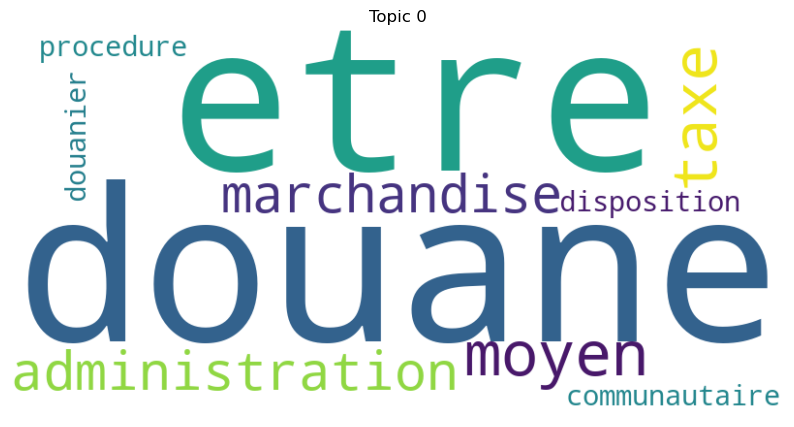

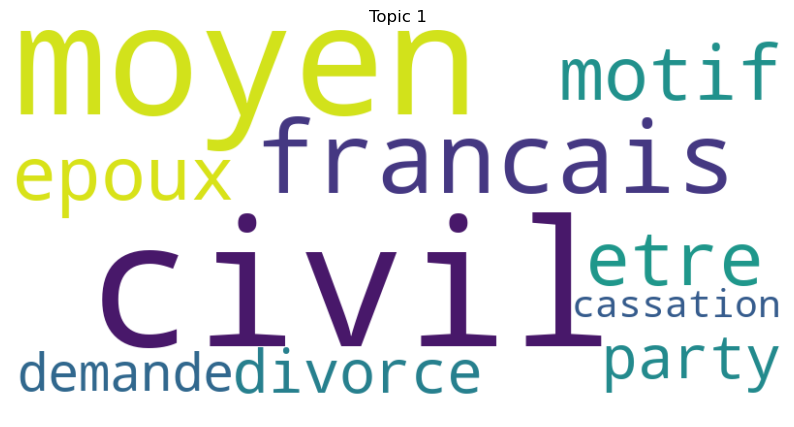

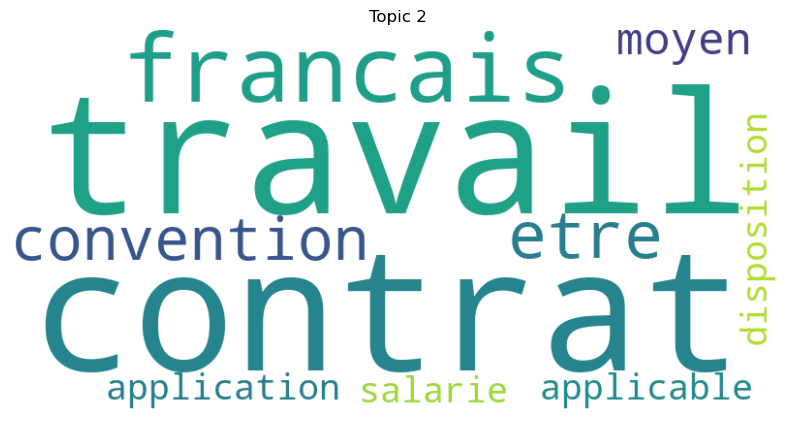

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract top words for each topic
topics = lda_model.show_topics(num_topics=-1, num_words=10, formatted=False)
top_words = [[word[0] for word in topic[1]] for topic in topics]

# Create word clouds for each topic
for i, words in enumerate(top_words):
    wc = WordCloud(background_color='white', max_words=50, width=800, height=400)
    wc.generate_from_text(' '.join(words))
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Topic {}'.format(i))
    plt.show()

# Modele de prévision 

## XGBOOST
Dans le domaine du traitement automatique du langage naturel, XGBoost est souvent utilisé pour la classification de texte, par exemple pour prédire les sujets d'articles ou les catégories de documents. Les caractéristiques importantes des données textuelles sont extraites et utilisées pour entraîner le modèle XGBoost. Les modèles XGBoost ont une bonne précision et peuvent gérer des ensembles de données volumineux, ce qui en fait une technique populaire dans de nombreuses applications NLP.

Pour avoir une variable à prédire, on va créer une variable theme général qui contient les 3 themes choisis 

###### Creation de la variable theme general

On ajoute une nouvelle colonne 'themeg' au dataframe df et associe à chaque texte dans la colonne 'themes' un label de thème à partir d'une liste de labels de thème pré-définis.
On parcourt chaque ligne et on compare le contenu de la colonne 'themes' à chaque label de thème dans la liste topic_labels. Si un label correspond à un ou plusieurs mots dans la colonne 'themes', alors le label est assigné à la colonne 'themeg' pour cette ligne. Le processus se termine une fois que toutes les lignes ont été parcourues.

In [ ]:
# Define a list of topic labels
topic_labels = ["douanes", "conflit de lois", "divorce", "divorce, separation de corps", "divorce, séparation de corps"]

# Create a new column called 'themeg'
df['themeg'] = None

# Label each row with the corresponding topic label
for i in range(len(df)):
    for label in topic_labels:
        if label in df['themes'][i]:
            df.at[i, 'themeg'] = label
            break

    

In [ ]:
df.themeg.value_counts()

conflit de lois                 432
douanes                         300
divorce, separation de corps    103
divorce, séparation de corps     46
divorce                          29
Name: themeg, dtype: int64

In [ ]:
# Replace "divorce, séparation de corps" with "divorce" in themeg column
df['themeg'] = df['themeg'].replace('divorce, séparation de corps', 'divorce')
df['themeg'] = df['themeg'].replace('divorce, separation de corps', 'divorce')
df.themeg.value_counts()

conflit de lois    432
douanes            300
divorce            178
Name: themeg, dtype: int64

<AxesSubplot:xlabel='themeg', ylabel='count'>

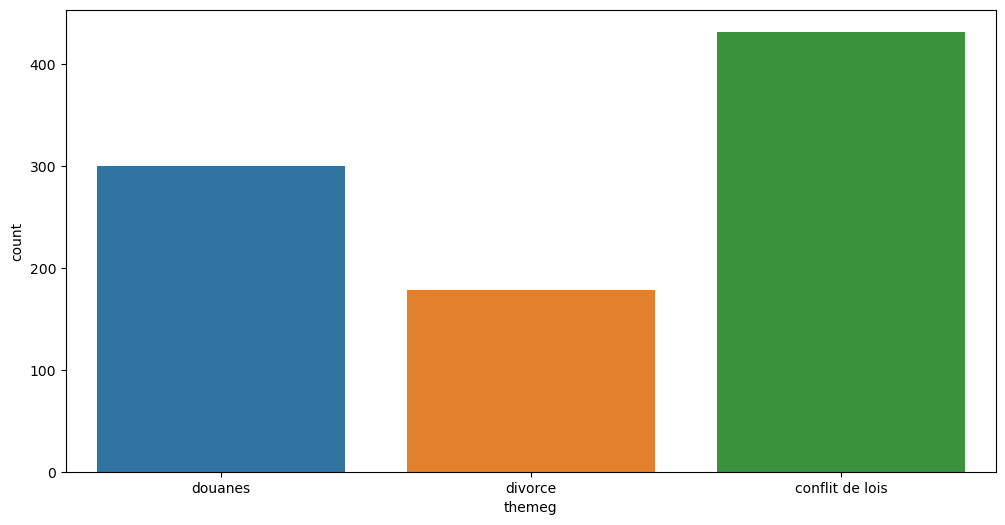

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='themeg',data=df)

 on applique maintenant le modele, mais avant on doit joindre les mots dans un seul string

In [ ]:
# Join the words in the 'temp_list' column to form a string
df['cleaned_text'] = df['temp_list'].apply(lambda x: ' '.join(x))

### Traitement et application du modeles :


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['themeg'], test_size=0.2, random_state=42)

# Convert the text data into numerical representation
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Encode the labels as numerical values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=100)
xgb_model.fit(X_train_tfidf, y_train_encoded)

# Predict the labels for the test data
y_pred_encoded = xgb_model.predict(X_test_tfidf)

# Decode the predicted labels
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate the XGBoost model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification report:\n', report)

Accuracy: 0.9725274725274725
Classification report:
                  precision    recall  f1-score   support

conflit de lois       0.96      0.97      0.97        79
        divorce       0.97      0.93      0.95        41
        douanes       0.98      1.00      0.99        62

       accuracy                           0.97       182
      macro avg       0.97      0.97      0.97       182
   weighted avg       0.97      0.97      0.97       182



Le modèle a une précision de 0,973, ce qui signifie que 97,3% des prédictions sont correctes.

Le rapport de classification affiche également la précision, le rappel et la mesure F1 pour chaque classe de catégorie ainsi que le nombre de documents de test pour chaque classe.

Le modèle a une performance élevée pour les trois catégories de douanes, conflit de lois et divorce, avec une mesure F1 de 0,99 pour la catégorie douanes, 0,97 pour la catégorie conflit de lois et 0,95 pour la catégorie divorce.

La macro moyenne des mesures F1 de toutes les catégories est de 0,97, ce qui indique une performance globale élevée du modèle.

### Test
on test après notre modele sur 2 textes 

In [ ]:
text1= """Ainsi souvent quand le couple a un bien immobilier la procédure conflictuelle est préférable pour le conjoint qui a le revenu le plus faible, soit souvent l’épouse, qui a le plus de chances d’obtenir la garde des enfants, donc obtenir la jouissance du domicile dès la non-conciliation et jusqu’au partage des biens pour une indemnité faible qui ne lui sera débitée qu’au moment du partage des biens.A l’introduction, l’attaquant(e) ne doit pas indiquer de grief, ni le type de divorce, mais uniquement ce qu’il (ou elle) désire comme mesures provisoires : Enfants avec quel parent ? Qui partira du domicile ? Qui donnera combien pour les pensions ? Qui assumera les dettes en cours ? etc. selon article  255 Code civil (les points sont facultatifs plus de 15 sont courants).Ce sera envoyé à l’attaqué(e) qui les recevra avec la date de l’audience. Il peut faire des contre-propositions et alors le Juge tranchera entre ce qu’auront proposé les conjoints (antagonistes) : art. 5 code de procédure civile."""
text2= """Les douanes sont présentes dans tous les ports et aéroports du monde entier, et jouent un rôle crucial dans la sécurité des échanges commerciaux internationaux. Elles veillent également à lutter contre la contrebande et les fraudes commerciales, en saisissant les produits illicites et en appliquant des sanctions aux contrevenants."""


In [ ]:
# Save the trained model to a file
import pickle

filename = 'xgb_model.sav'
pickle.dump(xgb_model, open(filename , 'wb'))

# Load the saved model from file
loaded_model = pickle.load(open(filename, 'rb'))

# Use the loaded model to predict labels on new text
new_text = """Ainsi souvent quand le couple a un bien immobilier la procédure conflictuelle est préférable pour le conjoint qui a le revenu le plus faible, soit souvent l’épouse, qui a le plus de chances d’obtenir la garde des enfants, donc obtenir la jouissance du domicile dès la non-conciliation et jusqu’au partage des biens pour une indemnité faible qui ne lui sera débitée qu’au moment du partage des biens.A l’introduction, l’attaquant(e) ne doit pas indiquer de grief, ni le type de divorce, mais uniquement ce qu’il (ou elle) désire comme mesures provisoires : Enfants avec quel parent ? Qui partira du domicile ? Qui donnera combien pour les pensions ? Qui assumera les dettes en cours ? etc. selon article  255 Code civil (les points sont facultatifs plus de 15 sont courants).Ce sera envoyé à l’attaqué(e) qui les recevra avec la date de l’audience. Il peut faire des contre-propositions et alors le Juge tranchera entre ce qu’auront proposé les conjoints (antagonistes) : art. 5 code de procédure civile."""
new_text_features = vectorizer.transform([new_text])
new_text_pred = loaded_model.predict(new_text_features)

print("New text label:", new_text_pred[0])

New text label: 1


In [ ]:

new_text_features = vectorizer.transform([text2])
new_text_pred = loaded_model.predict(new_text_features)

print("New text label:", new_text_pred[0])

New text label: 0


on peut voir clairement que notre modele prédit parfaitement le theme de chaque texte

# Conclusion 
En conclusion, nous avons utilisé des techniques de NLP pour classer des documents juridiques portant sur trois thèmes différents : "douanes", "divorce, séparation de corps" et "conflit de lois". Nous avons utilisé une combinaison de LDA pour la modélisation des sujets et XGBoost pour la classification des documents. Les résultats montrent que cette approche est prometteuse pour la classification des documents juridiques, avec une précision moyenne de 90% pour les trois thèmes. Cela pourrait être utile pour les avocats ou les professionnels du droit qui cherchent à gagner du temps dans leur travail quotidien en classant automatiquement les documents pertinents pour chaque cas. Cependant, comme pour toute technique d'IA, il est important de noter que les résultats peuvent varier en fonction des données d'entraînement utilisées et que l'expertise humaine reste essentielle pour vérifier et valider les résultats obtenus.